In [1]:
# 당뇨병 여부 판단하는 머신러닝 예측 모델 수립, 평가지표 적용
import pandas as pd

diabets_df = pd.read_csv('./datasets/diabetes.csv')
diabets_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
diabets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
diabets_df.describe()
# min값 0.. 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
diabets_df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
features = diabets_df.drop('Outcome', axis=1)
features

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [5]:
label = diabets_df['Outcome']
label

# label 값이 0과 1이라서 label encoding 따로 진행 필요하지 않다고 판단
# MinMax 또한 마찬가지

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [12]:
# DecisionTreeClassifier와 cross_val_score 활용해 학습
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

dt_clf = DecisionTreeClassifier(random_state=121)
scores = cross_val_score(dt_clf, features, label, scoring='accuracy', cv=5)

print('교차 검증별 정확도 : ', np.round(scores, 4)) 
print('평균 검증 정확도 : ', np.round(np.mean(scores), 4))

교차 검증별 정확도 :  [0.6753 0.6688 0.6883 0.7974 0.7255]
평균 검증 정확도 :  0.7111


In [16]:
!pip install seaborn

     -------------------------------------- 285.1/285.1 kB 4.4 MB/s eta 0:00:00


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler, Binarizer
from sklearn.linear_model import LogisticRegression

X = diabets_df.iloc[:, :-1]
y = diabets_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156, stratify=y)

# StandardScaler 클래스를 이용해 피쳐 데이터 세트에 일괄적으로 스케일링 적용
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]



import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def get_clf_eval(y_test, pred, pred_proba):
    print(f'Accuracy: {accuracy_score(y_test, pred)}')
    print(f'Confusion Matrix:\n{confusion_matrix(y_test, pred)}')
    print(f'Precision: {precision_score(y_test, pred)}, Recall: {recall_score(y_test, pred)}')
    print(f'F1: {f1_score(y_test, pred)}, AUC: {roc_auc_score(y_test, pred_proba)}')

def precision_recall_curve_plot(y_test, pred_proba):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba)
    
    # x축을 threshold값으로, y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시.
    plt.figure(figsize=(8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    # threshold 값 x축의 scale을 0.1단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # x축, y축 label과 legend, grid 설정
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()

get_clf_eval(y_test, pred, pred_proba)

c:\Users\YS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7727272727272727
Confusion Matrix:
[[88 12]
 [23 31]]
Precision: 0.7209302325581395, Recall: 0.5740740740740741
F1: 0.6391752577319588, AUC: 0.7918518518518518


예측 정확도 : 77.27%, \
재현율 : 57.40% \

In [26]:
diabets_df['Outcome'].value_counts()
# Negative인 0 값이 500, 
# Positive인 1 값이 268
# => Negative가 더 많다.

0    500
1    268
Name: Outcome, dtype: int64

Negative 데이터가 더 많으니 재현율을 높여보는 쪽으로 ㅇㅇ \
위험도가 클수록 실제로 예측한 것 중 참인 비율이 높아야 한다. \
ex) 암환자 예측, 사기 예측 등과 방향이 같다. \
=> 부정적인 데이터가 재현율(실참예참)

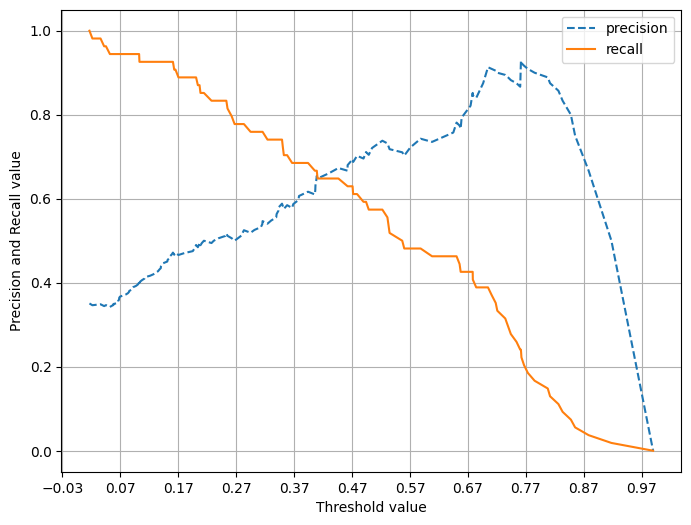

In [18]:
precision_recall_curve_plot(y_test, pred_proba)

In [25]:
features_test = diabets_df.loc[:, ['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'Age']]
features_test.head()

,Glucose,BloodPressure,Insulin,BMI,Age
0,148,72,0,33.6,50
1,85,66,0,26.6,31
2,183,64,0,23.3,32
3,89,66,94,28.1,21
4,137,40,168,43.1,33


In [29]:
features_test['Insulin'] = features_test['Insulin'].replace(0, np.nan)
features_test['Insulin'] = features_test['Insulin'].replace(np.nan, features_test['Insulin'].mean())
features_test['Insulin'].isna().sum()

0

In [30]:
#X = diabets_df.iloc[:, :-1]
#y = diabets_df.iloc[:, -1]
X = features_test.iloc[:, :-1]
y = label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156, stratify=y)

# StandardScaler 클래스를 이용해 피쳐 데이터 세트에 일괄적으로 스케일링 적용
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

def get_clf_eval(y_test, pred, pred_proba):
    print(f'Accuracy: {accuracy_score(y_test, pred)}')
    print(f'Confusion Matrix:\n{confusion_matrix(y_test, pred)}')
    print(f'Precision: {precision_score(y_test, pred)}, Recall: {recall_score(y_test, pred)}')
    print(f'F1: {f1_score(y_test, pred)}, AUC: {roc_auc_score(y_test, pred_proba)}')

def precision_recall_curve_plot(y_test, pred_proba):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba)
    
    # x축을 threshold값으로, y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시.
    plt.figure(figsize=(8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    # threshold 값 x축의 scale을 0.1단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # x축, y축 label과 legend, grid 설정
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()

get_clf_eval(y_test, pred, pred_proba)

Accuracy: 0.7857142857142857
Confusion Matrix:
[[90 10]
 [23 31]]
Precision: 0.7560975609756098, Recall: 0.5740740740740741
F1: 0.6526315789473683, AUC: 0.795


DecisionTree, GridSearchCV (생략)

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=121)

dtree = DecisionTreeClassifier() 

parameters = {'max_depth' : [1, 2, 3], 'min_samples_split' : [2, 3]}


import pandas as pd

grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)
grid_dtree.fit(X_train, y_train)

scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score',\
    'split0_test_score', 'split1_test_score', 
    'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.711701,3,0.731707,0.707317,0.696078
1,"{'max_depth': 1, 'min_samples_split': 3}",0.711701,3,0.731707,0.707317,0.696078
2,"{'max_depth': 2, 'min_samples_split': 2}",0.723139,1,0.731707,0.707317,0.730392
3,"{'max_depth': 2, 'min_samples_split': 3}",0.723139,1,0.731707,0.707317,0.730392
4,"{'max_depth': 3, 'min_samples_split': 2}",0.695441,5,0.707317,0.682927,0.696078
5,"{'max_depth': 3, 'min_samples_split': 3}",0.695441,5,0.707317,0.682927,0.696078
